In [1]:
import tensorflow as tf

2024-11-01 15:08:52.203984: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 15:08:52.258399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 15:08:52.258492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 15:08:52.260446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 15:08:52.273451: I tensorflow/core/platform/cpu_feature_guar

In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

2024-11-01 15:08:54.693314: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-01 15:08:54.769246: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-01 15:08:54.769737: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14145136121704878439
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4431347712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11330887083405450040
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [3]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "0"

In [4]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "3"

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras import datasets 

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                           padding='same', activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2024-11-01 15:08:55.939543: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-01 15:08:55.940214: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-01 15:08:55.940349: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5


2024-11-01 15:08:58.379117: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-11-01 15:08:58.533180: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-11-01 15:08:59.647620: I external/local_xla/xla/service/service.cc:168] XLA service 0x71109c5869d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-01 15:08:59.647693: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-11-01 15:08:59.655906: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730441339.772753   10433 device_compiler.h:186] Compiled clust

1875/1875 [==============================] - 17s 7ms/step - loss: 0.1186 - accuracy: 0.9628 - val_loss: 0.0379 - val_accuracy: 0.9882
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0348 - val_accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0311 - val_accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0247 - accuracy: 0.9918 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0316 - val_accuracy: 0.9904


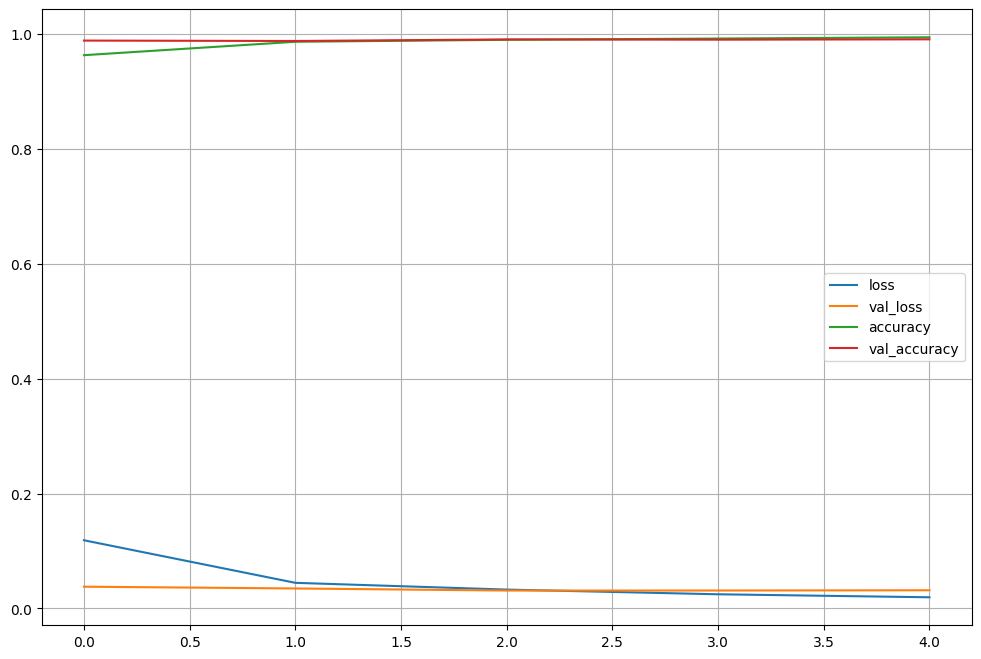

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [15]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0316 - accuracy: 0.9904
Test loss : 0.031646691262722015
Test accuracy : 0.9904000163078308


In [16]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [17]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)


len(wrong_result)

96

In [18]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[1903,
 7928,
 8325,
 1232,
 938,
 6608,
 4201,
 9793,
 3767,
 883,
 6166,
 3767,
 449,
 6091,
 1319,
 5676]

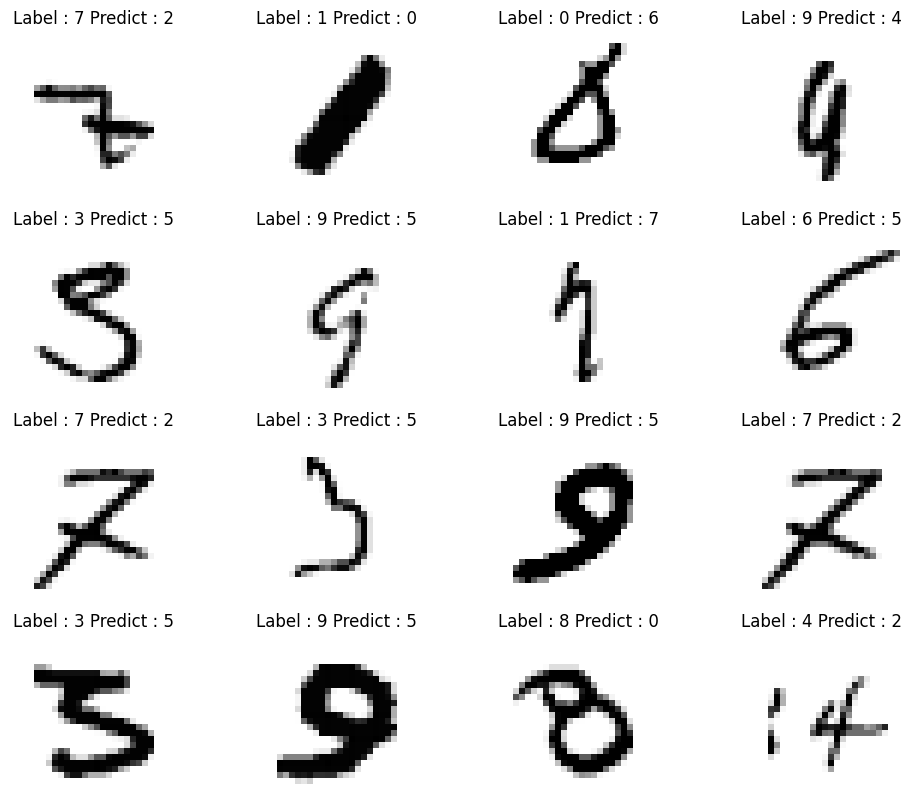

In [22]:
plt.figure(figsize=(12,10))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
plt.show()

In [20]:
from numba import cuda

device = cuda.get_current_device()
device.reset()

In [21]:
!nvidia-smi

Fri Nov  1 15:13:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...    Off | 00000000:01:00.0  On |                  N/A |
| N/A   53C    P0              27W /  80W |     65MiB /  6144MiB |     36%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--